In [6]:
from google.colab import files
uploaded = files.upload()


Saving spam.csv to spam (1).csv


In [7]:
# STEP 1 — Upload & Load Dataset
import pandas as pd

# If running in Google Colab, uncomment this:
# from google.colab import files
# uploaded = files.upload()

# If running in JupyterLab (cloud), upload file manually using the GUI (left panel)

# Load the file directly once uploaded to notebook directory
df = pd.read_csv("spam.csv", encoding="latin-1", engine="python", sep=",", on_bad_lines="skip")

# Keep only the first two columns
df = df.iloc[:, :2]
df.columns = ['label', 'message']

df.head()


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
# STEP 2 — Preprocess Data
import re
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

from nltk.corpus import stopwords

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = nltk.word_tokenize(text.lower())
    filtered = [t for t in tokens if t not in stopwords.words('english')]
    return ' '.join(filtered)

df['cleaned_message'] = df['message'].apply(preprocess_text)

# Convert labels to numeric
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

df.head()


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,label,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [9]:
# STEP 3 — Split Data
from sklearn.model_selection import train_test_split

X = df['cleaned_message']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [10]:
# STEP 4 — Feature Engineering (BoW)
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=10000, stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


In [11]:
# STEP 5 — Train Multiple Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

models = {
    "Naive Bayes": MultinomialNB(),
    "SVM (Linear)": SVC(kernel='linear', C=1.0),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

trained = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    trained[name] = model

print("All models trained successfully!")


All models trained successfully!


In [12]:
# STEP 6 — Evaluation
from sklearn.metrics import accuracy_score, classification_report

results = {}

for name, model in trained.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print("\n============================")
    print(f"MODEL: {name}")
    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

print("\n=== SUMMARY OF MODEL ACCURACIES ===")
results



MODEL: Naive Bayes
Accuracy: 0.9784688995215312
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1453
           1       0.93      0.90      0.92       219

    accuracy                           0.98      1672
   macro avg       0.96      0.95      0.95      1672
weighted avg       0.98      0.98      0.98      1672


MODEL: SVM (Linear)
Accuracy: 0.9754784688995215
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.98      0.83      0.90       219

    accuracy                           0.98      1672
   macro avg       0.98      0.91      0.94      1672
weighted avg       0.98      0.98      0.97      1672


MODEL: Logistic Regression
Accuracy: 0.9754784688995215
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1453
           1       0.99      0.82      0.90       219

    accuracy              

{'Naive Bayes': 0.9784688995215312,
 'SVM (Linear)': 0.9754784688995215,
 'Logistic Regression': 0.9754784688995215,
 'Random Forest': 0.9706937799043063}

Best Model: Naive Bayes


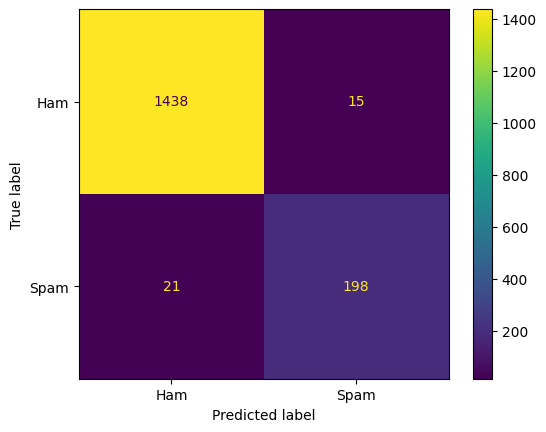

In [13]:
# STEP 7 — Confusion Matrix for Best Model
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

best_model_name = max(results, key=results.get)
best_model = trained[best_model_name]

print("Best Model:", best_model_name)

y_pred_best = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred_best)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ham', 'Spam'])
disp.plot(cmap='viridis')


In [14]:
#SECTION 2 — NEWS ARTICLE CLASSIFICATION (TASK 3.2)
# STEP 1 — Load Dataset
from sklearn.datasets import fetch_20newsgroups

categories = [
    'rec.sport.baseball',
    'comp.sys.mac.hardware',
    'sci.crypt',
    'talk.politics.misc'
]

data = fetch_20newsgroups(
    subset="all",
    categories=categories,
    remove=("headers", "footers", "quotes")
)

len(data.data), len(data.target)



(3723, 3723)

In [15]:
# STEP 2 — Clean Text
import nltk
import re
from nltk.corpus import stopwords
from nltk import word_tokenize

nltk.download('punkt_tab')
nltk.download('stopwords')

def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data = [clean_text(doc) for doc in data.data]


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# STEP 3 — Split
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    cleaned_data, data.target, test_size=0.3, random_state=42
)


In [17]:
# STEP 4 — TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=500,
    ngram_range=(1, 3)
)

X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)


In [18]:
# STEP 5 — Train Baseline SVM
from sklearn.svm import LinearSVC

model_baseline = LinearSVC()
model_baseline.fit(X_train, y_train)


LinearSVC()

Baseline Accuracy: 0.7994628469113697

Classification Report:

                       precision    recall  f1-score   support

comp.sys.mac.hardware       0.87      0.77      0.82       280
   rec.sport.baseball       0.75      0.91      0.82       309
            sci.crypt       0.83      0.79      0.81       314
   talk.politics.misc       0.74      0.70      0.72       214

             accuracy                           0.80      1117
            macro avg       0.80      0.79      0.79      1117
         weighted avg       0.80      0.80      0.80      1117



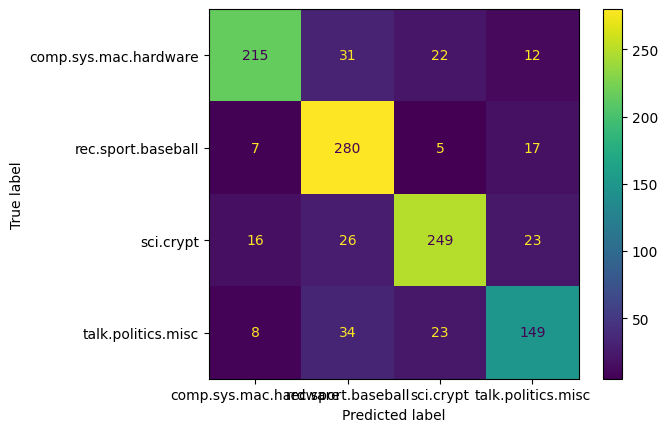

In [19]:
# STEP 6 — Predict & Evaluate Baseline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred_base = model_baseline.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_base))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_base, target_names=data.target_names))

cm = confusion_matrix(y_test, y_pred_base)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='viridis')


In [20]:
#IMPROVEMENTS (TASK 3.2 ii & iii)

In [21]:
# Improved Preprocessing
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def clean_text2(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(t) for t in tokens
              if t not in stopwords.words('english')]
    return ' '.join(tokens)

cleaned_data2 = [clean_text2(doc) for doc in data.data]


[nltk_data] Downloading package wordnet to /root/nltk_data...


In [22]:
X_train2_raw, X_test2_raw, y_train2, y_test2 = train_test_split(
    cleaned_data2, data.target, test_size=0.3, random_state=42
)


In [23]:
vectorizer2 = TfidfVectorizer(
    stop_words='english',
    max_features=10000,
    ngram_range=(1, 2)
)

X_train2 = vectorizer2.fit_transform(X_train2_raw)
X_test2 = vectorizer2.transform(X_test2_raw)


In [24]:
from sklearn.svm import LinearSVC

model_improved = LinearSVC(C=0.5)
model_improved.fit(X_train2, y_train2)


LinearSVC(C=0.5)

Improved Accuracy: 0.8907788719785139

Classification Report:
                       precision    recall  f1-score   support

comp.sys.mac.hardware       0.92      0.90      0.91       280
   rec.sport.baseball       0.85      0.96      0.91       309
            sci.crypt       0.92      0.84      0.88       314
   talk.politics.misc       0.87      0.85      0.86       214

             accuracy                           0.89      1117
            macro avg       0.89      0.89      0.89      1117
         weighted avg       0.89      0.89      0.89      1117



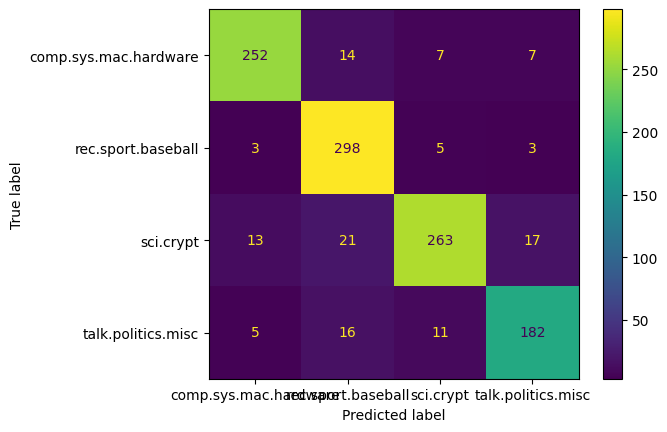

In [25]:
y_pred_improved = model_improved.predict(X_test2)

print("Improved Accuracy:", accuracy_score(y_test2, y_pred_improved))
print("\nClassification Report:")
print(classification_report(y_test2, y_pred_improved, target_names=data.target_names))

cm2 = confusion_matrix(y_test2, y_pred_improved)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=data.target_names)
disp2.plot(cmap='viridis')


In [26]:
#TRY ANOTHER MODEL (3.2 iv)

from sklearn.linear_model import SGDClassifier

model_sgd = SGDClassifier(loss='hinge')
model_sgd.fit(X_train, y_train)

y_pred_sgd = model_sgd.predict(X_test)

print("SGD Accuracy:", accuracy_score(y_test, y_pred_sgd))



SGD Accuracy: 0.7815577439570277


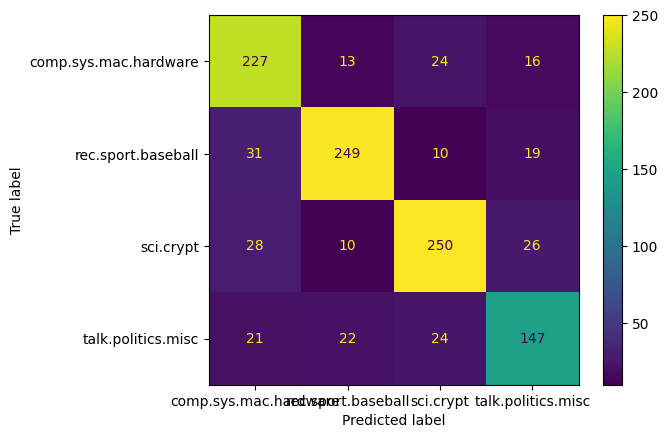

In [27]:
cm3 = confusion_matrix(y_test, y_pred_sgd)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=data.target_names)
disp3.plot(cmap='viridis')
